# Домашнее задание к лекции «Корреляция и корреляционный анализ»

**Возьмите датасет Mortality and Water Hardness**
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

*В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.*

## Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построить точечный график
1. Рассчитать коэффициенты корреляции Пирсона и Спирмена
1. Построить модель линейной регрессии
1. Рассчитать коэффициент детерминации
1. Вывести график остатков

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('water.csv')
df=df[['location', 'town', 'mortality', 'hardness']]
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


Text(0, 0.5, 'смертность')

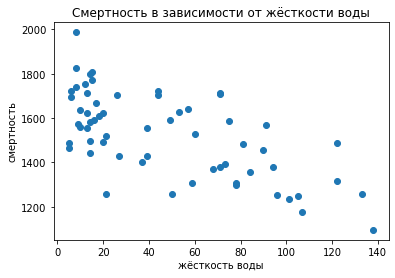

In [4]:
plt.scatter(df['hardness'],df['mortality'])
plt.title('Смертность в зависимости от жёсткости воды')
plt.xlabel('жёсткость воды')
plt.ylabel('смертность')

In [6]:
print('Взаимосвязь между жёсткостью воды и смертностью')
print(round(df[['hardness', 'mortality']].corr(method='spearman')['hardness']['mortality'],3),' - коэффициент корреляции Спирмена')
print(round(df[['hardness', 'mortality']].corr(method='pearson')['hardness']['mortality'],3),' -  коэффициент корреляции Пирсона')

Взаимосвязь между жёсткостью воды и смертностью
-0.632  - коэффициент корреляции Спирмена
-0.655  -  коэффициент корреляции Пирсона


Наблюдается обратно пропорциональная связь между жёсткостью воды и смертностью

In [7]:
# подготовка к разделению выборки на обучающую и тестовую
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [8]:
model = LinearRegression() # создание объекта - модели линейной регрессии
model.fit(X_train, y_train) # обучение модели на обучающей выборке
y_pred = model.predict(X_test) # предсказание обученной модели на тестовых данных

In [9]:
print(f'Коэффициент детерминации составил {round(model.score(X_test, y_test),3)}')

Коэффициент детерминации составил 0.306


Text(0, 0.5, 'смертность')

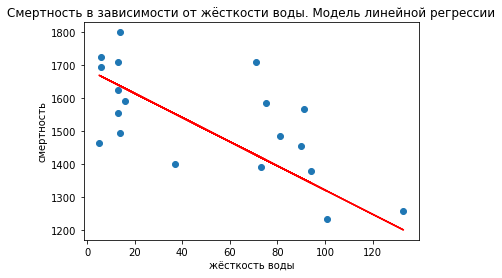

In [10]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('Смертность в зависимости от жёсткости воды. Модель линейной регрессии')
plt.xlabel('жёсткость воды')
plt.ylabel('смертность')

(array([1., 2., 2., 3., 2., 3., 2., 2., 1., 1.]),
 array([-203.78266981, -155.34831669, -106.91396357,  -58.47961045,
         -10.04525733,   38.38909579,   86.82344891,  135.25780202,
         183.69215514,  232.12650826,  280.56086138]),
 <BarContainer object of 10 artists>)

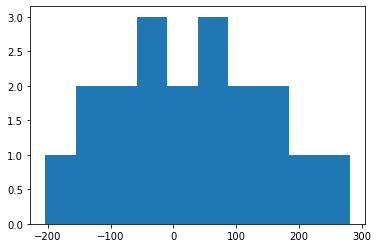

In [11]:
plt.hist(y_test - y_pred)

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

1. Разделить данные на 2 группы
1. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [13]:
# Разделим данные на северную и южную группы

dfs = df.loc[df['location']=='South']
dfn = df.loc[df['location']=='North']

### Рассмотрим юг:

Text(0, 0.5, 'смертность')

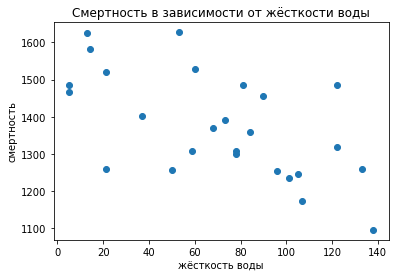

In [14]:
plt.scatter(dfs['hardness'],dfs['mortality'])
plt.title('Смертность на юге в зависимости от жёсткости воды')
plt.xlabel('жёсткость воды')
plt.ylabel('смертность')

In [15]:
print('Взаимосвязь между жёсткостью воды и смертностью')
print(round(dfs[['hardness', 'mortality']].corr(method='spearman')['hardness']['mortality'],3),' - коэффициент корреляции Спирмена')
print(round(dfs[['hardness', 'mortality']].corr(method='pearson')['hardness']['mortality'],3),' -  коэффициент корреляции Пирсона')

Взаимосвязь между жёсткостью воды и смертностью
-0.596  - коэффициент корреляции Спирмена
-0.602  -  коэффициент корреляции Пирсона


Для юга наблюдается обратно пропорциональная связь между жёсткостью воды и смертностью, но она слабее, чем в целом по всем данным.

In [16]:
# подготовка к разделению выборки на обучающую и тестовую
X = dfs[['hardness']]
y = dfs['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [17]:
model = LinearRegression() # создание объекта - модели линейной регрессии
model.fit(X_train, y_train) # обучение модели на обучающей выборке
y_pred = model.predict(X_test) # предсказание обученной модели на тестовых данных

In [18]:
print(f'Коэффициент детерминации составил {round(model.score(X_test, y_test),3)}')

Коэффициент детерминации составил 0.199


Text(0, 0.5, 'смертность')

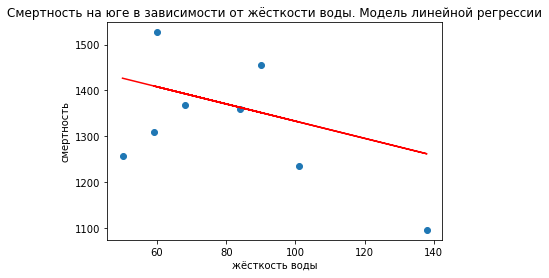

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('Смертность на юге в зависимости от жёсткости воды. Модель линейной регрессии')
plt.xlabel('жёсткость воды')
plt.ylabel('смертность')

(array([2., 0., 2., 0., 0., 2., 0., 0., 0., 2.]),
 array([-169.81269955, -140.9391064 , -112.06551325,  -83.1919201 ,
         -54.31832695,  -25.4447338 ,    3.42885936,   32.30245251,
          61.17604566,   90.04963881,  118.92323196]),
 <BarContainer object of 10 artists>)

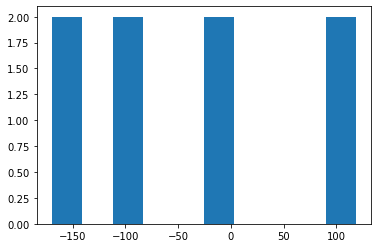

In [22]:
plt.hist(y_test - y_pred)

Качество модели стало намного хуже для юга.

### Рассмотрим север:

Text(0, 0.5, 'смертность')

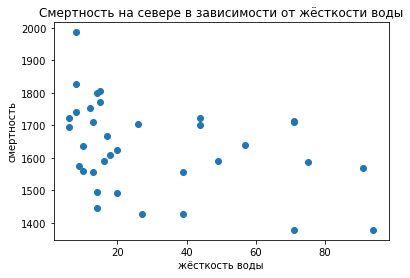

In [25]:
plt.scatter(dfn['hardness'],dfn['mortality'])
plt.title('Смертность на севере в зависимости от жёсткости воды')
plt.xlabel('жёсткость воды')
plt.ylabel('смертность')

In [26]:
print('Взаимосвязь между жёсткостью воды и смертностью')
print(round(dfn[['hardness', 'mortality']].corr(method='spearman')['hardness']['mortality'],3),' - коэффициент корреляции Спирмена')
print(round(dfn[['hardness', 'mortality']].corr(method='pearson')['hardness']['mortality'],3),' -  коэффициент корреляции Пирсона')

Взаимосвязь между жёсткостью воды и смертностью
-0.404  - коэффициент корреляции Спирмена
-0.369  -  коэффициент корреляции Пирсона


Зависимость ещё слабее, чем для юга и в целом по данным

In [27]:
# подготовка к разделению выборки на обучающую и тестовую
X = dfn[['hardness']]
y = dfn['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
model = LinearRegression() # создание объекта - модели линейной регрессии
model.fit(X_train, y_train) # обучение модели на обучающей выборке
y_pred = model.predict(X_test) # предсказание обученной модели на тестовых данных

In [29]:
print(f'Коэффициент детерминации составил {round(model.score(X_test, y_test),3)}')

Коэффициент детерминации составил -0.806


Text(0, 0.5, 'смертность')

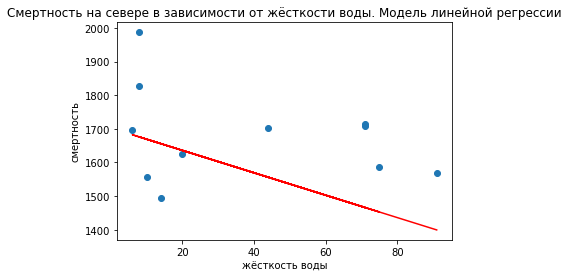

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('Смертность на севере в зависимости от жёсткости воды. Модель линейной регрессии')
plt.xlabel('жёсткость воды')
plt.ylabel('смертность')

(array([1., 1., 0., 2., 0., 0., 4., 0., 2., 1.]),
 array([-160.77616088, -113.57285996,  -66.36955905,  -19.16625814,
          28.03704278,   75.24034369,  122.44364461,  169.64694552,
         216.85024644,  264.05354735,  311.25684826]),
 <BarContainer object of 10 artists>)

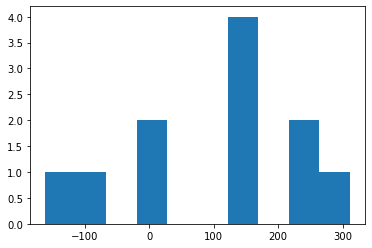

In [32]:
plt.hist(y_test - y_pred)

Остатки в целом отдалённо напоминают нормальное распределение, но явно не полностью.